# Implementação de rede perceptron em python

### Objetivo

Esse notebook tem como objetivo mostrar uma implementação detalhada de uma rede neural perceptron utilizando python e a biblioteca numpy.

Como exemplo, utilizaremos o problema clássico de classificação de flores utilizando o famoso dataset iris.csv, com simplificação para duas classes de flores.

In [1]:
# Carregando as bibliotecas que iremos utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando funções auxiliares
from funcoes_utils import carregar_dados

In [3]:
# Abrindo o nosso dataset utilizando a função carregar_dados
header, features, saida_y = carregar_dados('iris.csv')

Plotando os valores das features teremos um gráfico que claramente pode ser separado linearmente, ou seja, podemos aplicar a rede perceptron para solucionar nosso problema de classificação de flores

Text(0,0.5,'Sepal Length')

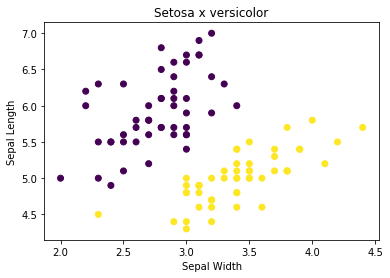

In [12]:
plt.scatter(features[:,1],features[:,0], c=saida_y)
plt.title("Setosa x versicolor" )
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

In [43]:
#Criaremos a classe perceptron

class Perceptron(object):
    def __init__(self, alpha=0.01, n_features=4, n_iter = 2000):
        self.pesos = np.random.uniform(-1,1, n_features+1) # adicionamos +1 por causa do bias
        self.alpha = 0.01
        self.n_epocas = n_iter
        self.bias = 1
    
    def funcao_ativacao(self, y):
        if y >= 0.0:
            return 1
        else:
            return 0
    
    def treinamento_perceptron(self, features, resultados):
        #inserindo o bias de 1 nas nossas features
        features = np.insert(features[:,], len(features[0]), self.bias, axis=1)
        for i in range(self.n_epocas):
            #print("Estamos na época: {}".format(i))
            erro = 0
            for j, linha in enumerate(features):
                y = self.pesos.dot(linha)
                if self.funcao_ativacao(y) != resultados[j]:
                    erro +=1
                    self.pesos += self.alpha*(resultados[j] - y)*linha
            if erro == 0:
                print("Script encerrado em época: {}".format(i))
                break
     
    def predicao(self, dados):
        # podemos passar um conjunto de valores ou apenas um vetor de uma dimensao
        if np.ndim(dados) == 1:
            dados = np.insert(dados,len(dados),self.bias) #inserindo o bias
            return self.funcao_ativacao(self.pesos.dot(dados)) # realizando a predição
        else: #se tivermos um conjuntno de dados com mais de uma dimensão
            dados = np.insert(dados[:,], len(dados[0]), self.bias, axis=1) #inserindo o bias
            resultado_predicao = [self.funcao_ativacao(self.pesos.dot(linha)) for linha in dados]
            return resultado_predicao

In [44]:
perceptron = Perceptron(n_features=4)
perceptron.treinamento_perceptron(features, saida_y)

In [45]:
predicoes = perceptron.predicao(features)

In [46]:
# podemos criar uma função para calcular a acurácia
def acuracia(saida_y, predictions):
    correct = 0
    for x in range(len(saida_y)):
        if saida_y[x] == predictions[x]:#Compara os respectivos valores
            correct += 1
    return float(correct)/len(saida_y)

In [47]:
acuracia(saida_y, predicoes)

0.99